In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [3]:
data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='target')
print(x.head())
print(y.head())
print(data.keys())
print(data.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

In [5]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

confusion matrix:
 [[41  2]
 [ 1 70]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

roc auc score: 0.99737962659679


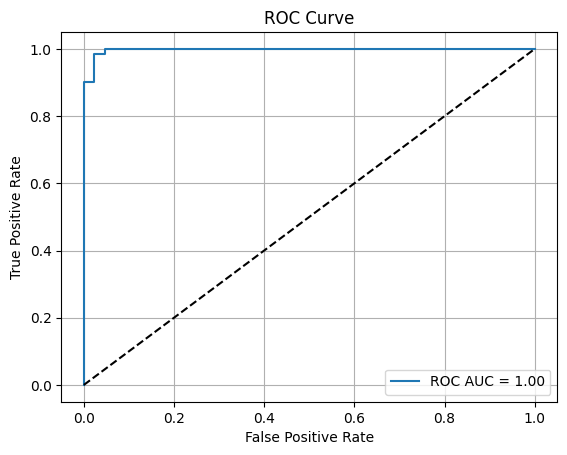

In [6]:
y_pred=model.predict(x_test_scaled)
y_probs=model.predict_proba(x_test_scaled)[:,1]
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
roc_auc=roc_auc_score(y_test,y_probs)
print("roc auc score:",roc_auc)
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
plt.plot(fpr,tpr,label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
custom_threshold = 0.3
y_custom_pred = (y_probs >= custom_threshold).astype(int)
print("Confusion Matrix (Threshold = 0.3):\n", confusion_matrix(y_test, y_custom_pred))
print("\nClassification Report:\n", classification_report(y_test, y_custom_pred))


Confusion Matrix (Threshold = 0.3):
 [[41  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

